# Importing necessary dependencies

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the dataset
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
#checking the null values
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
#dropping the null values for column 'text' 
df = df[~(df.text.isna())]

In [8]:
#null value percentage
df.isna().mean() * 100

id        0.000000
title     2.687732
author    9.238476
text      0.000000
label     0.000000
dtype: float64

In [9]:
#null value percentage
print(f'{0} is Non Fake news')
print(f'{1} Fake News')
df.label.value_counts()

0 is Fake news
1 is Not Fake News


0    10387
1    10374
Name: label, dtype: int64

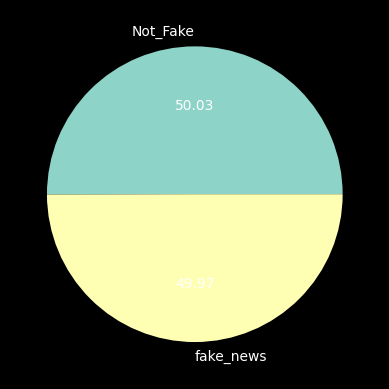

In [10]:
#Pie plot of value counts of fake news and non fake news
plt.style.use('dark_background')
plt.pie(df.label.value_counts(),autopct='%.2f',labels={'fake_news','Not_Fake'})
plt.show()

# Data preprocessing

In [11]:
#we chose to replace null values with empty string and concatanate the cols
df.replace({np.NaN:''},inplace=True)

In [12]:
#creating a new feature which is concatnation of every other feature
df['new_text'] = df['title']+' '+df['author']+' '+df['text']

In [13]:
df.head()

,id,title,author,text,label,new_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [14]:
#keeping the original data as it is and preprocessing the new feature
df= df.iloc[:,4:]

In [15]:
df.head()

,label,new_text
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [16]:
df.rename(columns={'new_text':'text'},inplace=True)

In [17]:
#calculating the length of each datapoint
df['len_text'] = df.text.apply(lambda x:len(x))

In [18]:
# data preprocessing using nltk

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rahul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#similarly adding feature with word length and sentence length to get some insights
df['len_word'] = df.text.apply(lambda x : len(word_tokenize(x)))

In [21]:
df['len_sent'] = df.text.apply(lambda x :len(sent_tokenize(x)))

In [22]:
df.head()

,label,text,len_text,len_word,len_sent
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...,5026,964,37
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",4232,836,29
2,1,Why the Truth Might Get You Fired Consortiumne...,7745,1462,51
3,1,15 Civilians Killed In Single US Airstrike Hav...,3317,624,27
4,1,Iranian woman jailed for fictional unpublished...,1047,193,5


<font color ='red'><b>plot of fake news and non fake news based on the length of each rows/datapoint

(-1000.0, 20000.0)

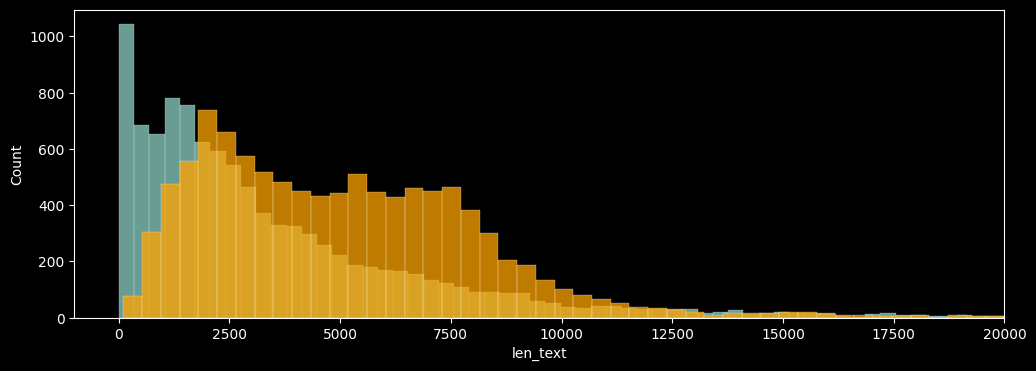

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
sb.histplot(df[df.label==1]['len_text'])
sb.histplot(df[df.label==0]['len_text'],color='orange')
plt.xlim(-1000,20000)

<font color ='red'><b>plot of fake news and non fake news based on the length of each words in each rows/datapoint

(0.0, 1200.0)

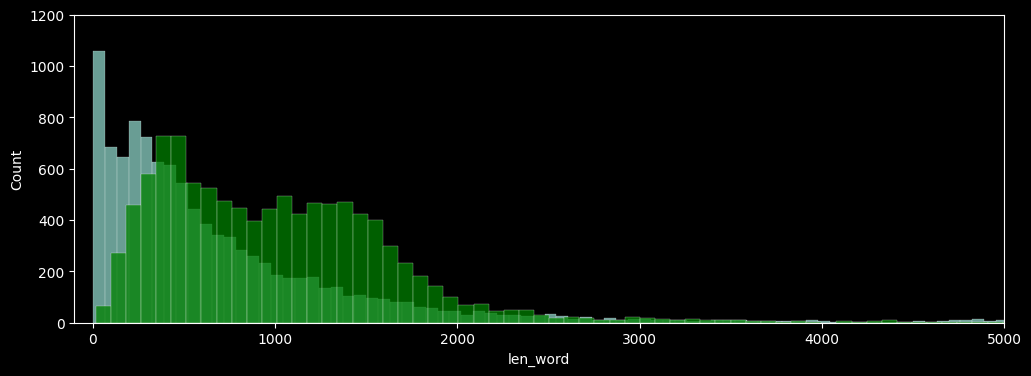

In [24]:
plt.figure(figsize=(12,4))
sb.histplot(df[df.label==1]['len_word'])
sb.histplot(df[df.label==0]['len_word'],color='green')
plt.xlim(-100,5000)
plt.ylim(0,1200)

<font color ='red'><b> summarizing the statistical features

In [ ]:
df.iloc[:,2:].describe()

,len_text,len_word,len_sent
count,20761.000000,20761.000000,20761.000000
mean,4640.926400,902.633736,35.245219
std,5134.430635,1017.147876,46.117458
min,8.000000,2.000000,1.000000
25%,1716.000000,331.000000,12.000000
50%,3454.000000,666.000000,24.000000
75%,6371.000000,1239.000000,48.000000
max,143053.000000,28022.000000,1444.000000


<font color='red'><b>Pair plot

<Figure size 2500x2500 with 0 Axes>

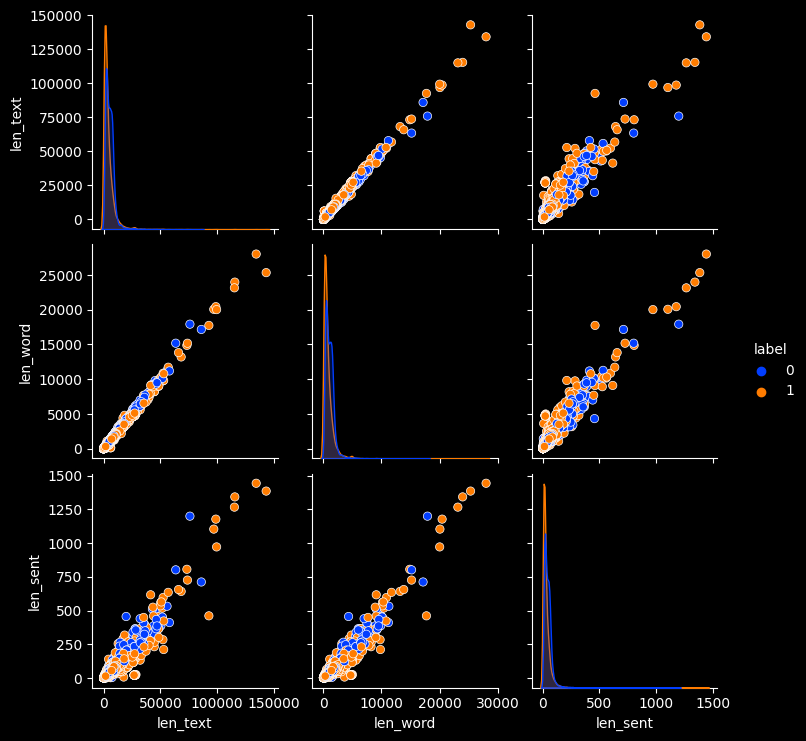

In [25]:
plt.figure(figsize=(25,25))
sb.pairplot(df,hue='label',palette='bright')

<font color='red'><b> Handling outliers

In [27]:
df = df[df['len_word'] < 3500]  #set threshold as 3500 from plot

<font color='red'><b>Visualizing after handling outlier

(0.0, 1200.0)

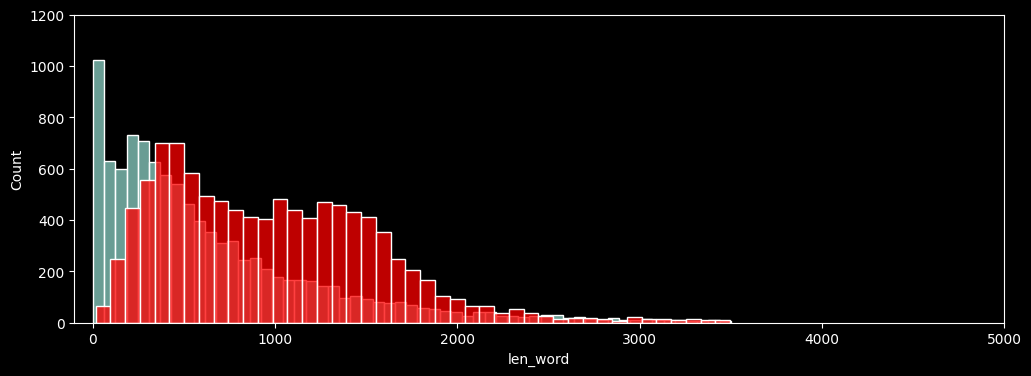

In [28]:
plt.figure(figsize=(12,4))
sb.histplot(df[df.label==1]['len_word'])
sb.histplot(df[df.label==0]['len_word'],color='red')
plt.xlim(-100,5000)
plt.ylim(0,1200)

<font color='red'><b>Pair plot

<Figure size 2500x2000 with 0 Axes>

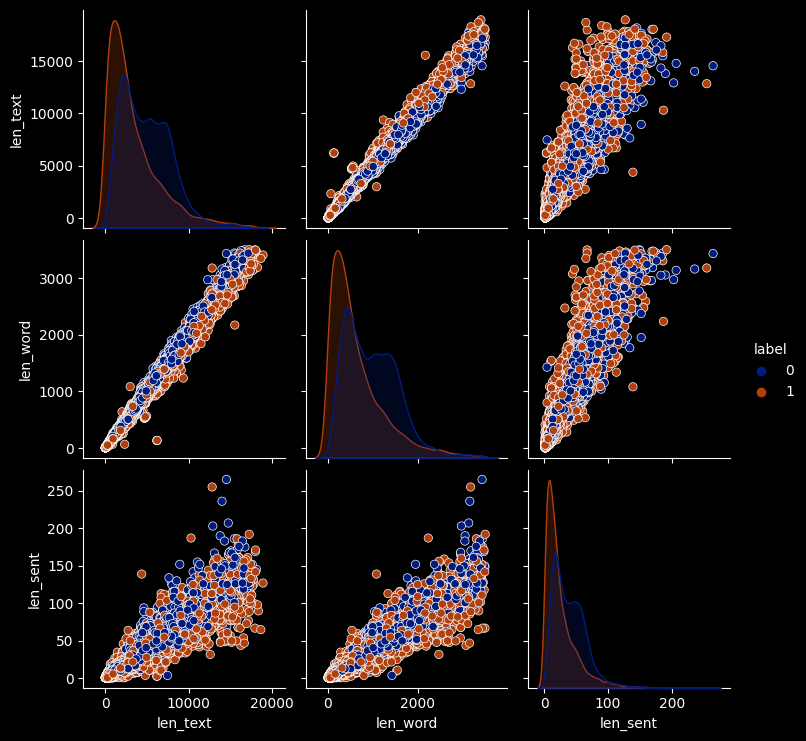

In [29]:
plt.figure(figsize=(25,20))
sb.pairplot(df,hue='label',palette='dark')

/tmp/ipykernel_3280/2831532363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True,fmt='.1f',cmap='Blues') #correlation plot


<AxesSubplot: >

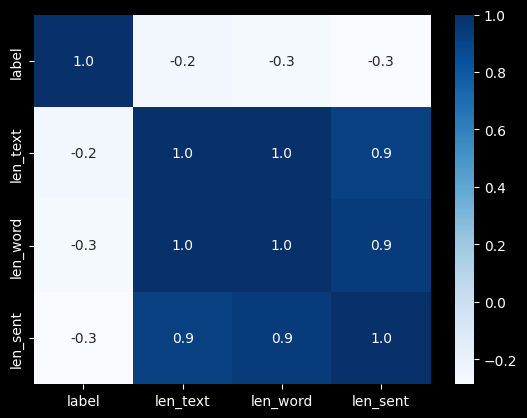

In [30]:
sb.heatmap(df.corr(),annot=True,fmt='.1f',cmap='Blues') #correlation plot

<font color='red'><b>Preprocessing using nltk

In [32]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import re
nltk.download('stopwords')
snow = SnowballStemmer('english')
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/rahul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def text_transform(text):
    text = text.lower()
    text = re.sub('[^a-z0-9]',' ',text)
    text = word_tokenize(text)
    text = [snow.stem(i) for i in text if not i in stop]
    text = [i for i in text if not i in string.punctuation]
    text = ' '.join(text)
    return text

In [34]:
df['Transformed_text'] = df['text'].apply(text_transform)

/tmp/ipykernel_3280/3452121987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['text'].apply(text_transform)


In [35]:
df.head()

,label,text,len_text,len_word,len_sent,Transformed_text
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...,5026,964,37,hous dem aid even see comey letter jason chaff...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",4232,836,29,flynn hillari clinton big woman campus breitba...
2,1,Why the Truth Might Get You Fired Consortiumne...,7745,1462,51,truth might get fire consortiumnew com truth m...
3,1,15 Civilians Killed In Single US Airstrike Hav...,3317,624,27,15 civilian kill singl us airstrik identifi je...
4,1,Iranian woman jailed for fictional unpublished...,1047,193,5,iranian woman jail fiction unpublish stori wom...


<font color='red'><b>Word cloud for Fake news

In [36]:
from wordcloud import WordCloud

wc = WordCloud(width=1500,height=700,min_font_size=5)

fake_news = df[df['label']==1]['Transformed_text'].str.cat(sep=' ')

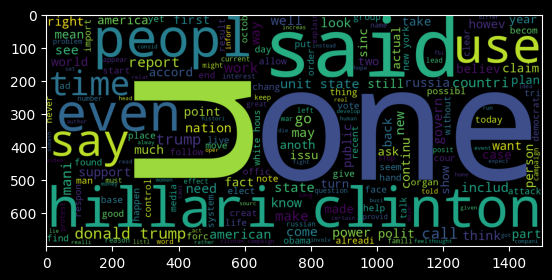

In [37]:
wc_fake_news=wc.generate(fake_news)
plt.imshow(wc_fake_news)

<font color='red'><b>Word cloud Non Fake news

In [38]:
true_news = df[df['label']==0]['Transformed_text'].str.cat(sep=' ')

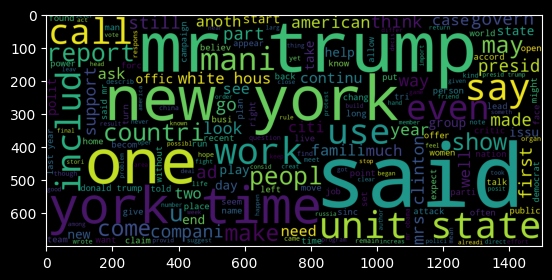

In [39]:
wc_true_news = wc.generate(true_news)
plt.imshow(wc_true_news)

<font color='red'><b>Top 30 used word in Fake news and Non fake news

In [40]:
from collections import Counter

In [41]:
top_30_used_words_true_news = df[df.label == 0 ]['Transformed_text'].apply(lambda x:word_tokenize(x))

In [42]:
top_30_used_words_true_news[1][0]

'flynn'

In [43]:
top_30_true_news_words = []
for i in top_30_used_words_true_news:
    for j in i:
        top_30_true_news_words.append(j)

In [44]:
com_30_true = Counter(top_30_true_news_words).most_common(30)

In [45]:
df_com_30_true = pd.DataFrame(com_30_true)

<font color='red'><b> most common words in Fake news

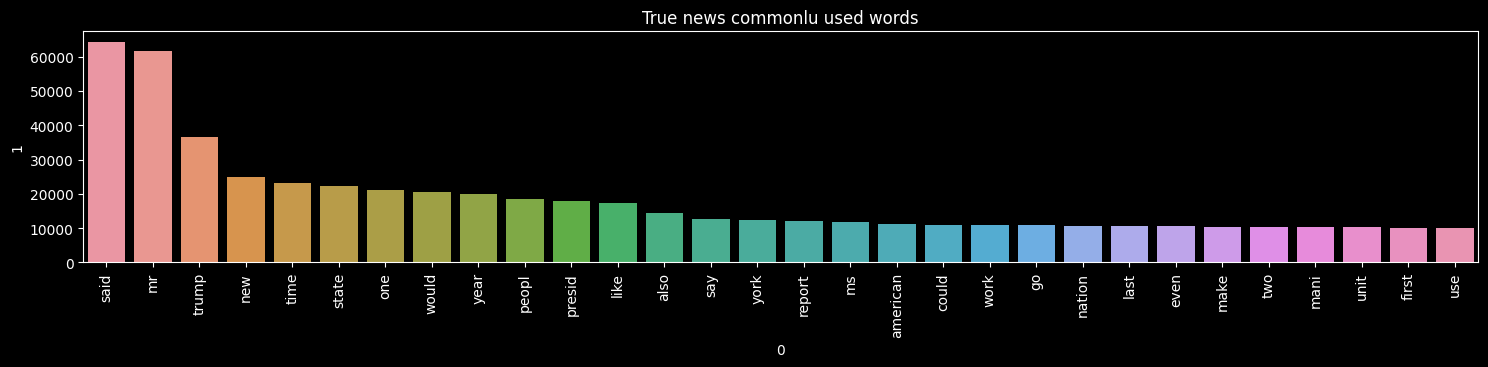

In [46]:
plt.figure(figsize=(18,3))
plt.title('True news commonlu used words')
sb.barplot(x = df_com_30_true[0],y = df_com_30_true[1])
plt.xticks(rotation='vertical')
plt.show()

<font color='red'><b> Most common wods in Non Fake news

In [47]:
top_30_used_words_fake_news = df[df.label == 1 ]['Transformed_text'].apply(lambda x:word_tokenize(x))

fake_news_words = []
for i in top_30_used_words_fake_news:
    for j in i:
        fake_news_words.append(j)

df_fake_news = pd.DataFrame(Counter(fake_news_words).most_common(30))

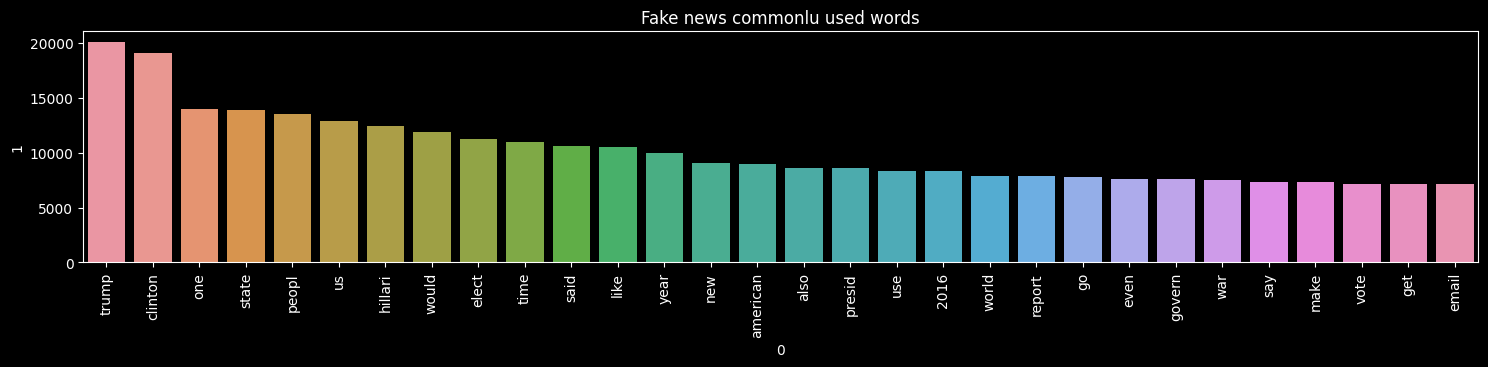

In [48]:
plt.figure(figsize=(18,3))
plt.title('Fake news commonlu used words')
sb.barplot(x=df_fake_news[0],y=df_fake_news[1])
plt.xticks(rotation='vertical')
plt.show()

<font color='red'><b>Vectorization of the words

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

In [50]:
X = tf.fit_transform(df['Transformed_text'].head(2000))

In [51]:
X.shape

(2000, 32291)

<font color='red'><b>Splitting into features and target

In [52]:
X = X.toarray()

In [53]:
y = df['label'].head(2000)

# Model Building

<font color='red'><b>Train Test split

In [54]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<font color='red'><b> Implementing Naive bayes algorithm

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb =GaussianNB()
mnb = MultinomialNB()
bn = BernoulliNB()

In [56]:
lst = [gnb,mnb,bn]

In [57]:
lst_in = {0:'Gaussian_nb',1:'Multinomial_nb',2:'Bernouli_nb'}

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [59]:
def best_mdl(xtr,xt,ytr,yt):
    dict = {}
    dict1 = {}
    dict2 = {}
    for i,model in enumerate(lst):
        model.fit(xtr,ytr)
        y_pred = model.predict(xt)
        scr = accuracy_score(yt,y_pred)
        cf = confusion_matrix(yt,y_pred)
        pre = precision_score(yt,y_pred)
        print(model)
        print(scr)
        print(cf)
        print(pre)
        print('____________')
    

In [60]:
best_mdl(X_train,X_test,y_train,y_test)

GaussianNB()
0.7675
[[180  32]
 [ 61 127]]
0.7987421383647799
____________
MultinomialNB()
0.85
[[208   4]
 [ 56 132]]
0.9705882352941176
____________
BernoulliNB()
0.715
[[131  81]
 [ 33 155]]
0.6567796610169492
____________


<font color='red'><b> Implementing other Algorithms

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
lst =[svc,knc,mnb,dtc,lrc,rfc,abc,bc,etc,gbdt,xgb]
dct = {0:'svc',1:'knc',2:'mnb',3:'dtc',4:'lrc',5:'rfc',6:'abc',7:'bc',8:'etc',9:'gbdt',10:'xgb'}

In [64]:
dict = {}
dict1 = {}
for j,i in enumerate(lst):
        i.fit(X_train,y_train)
        yp = i.predict(X_test)
        dict[dct[j]] = accuracy_score(y_test,yp)
        dict1[dct[j]] = precision_score(y_test,yp)
a = pd.Series(dict)
b = pd.Series(dict1)
df = pd.concat([a,b],axis=1)
df.rename(columns={0:'Accuracy',1:'Pecision'},inplace=True)

In [65]:
df = df.sort_values('Accuracy',ascending=False)

In [66]:
df

,Accuracy,Pecision
xgb,0.9475,0.946524
abc,0.9450,0.936842
gbdt,0.9375,0.940541
bc,0.9350,0.930851
svc,0.9225,0.894472
dtc,0.9200,0.902062
lrc,0.8725,0.824645
rfc,0.8700,0.909639
etc,0.8700,0.925000
mnb,0.8500,0.970588


In [67]:
df['index'] = dct.values()

In [68]:
df

,Accuracy,Pecision,index
xgb,0.9475,0.946524,svc
abc,0.9450,0.936842,knc
gbdt,0.9375,0.940541,mnb
bc,0.9350,0.930851,dtc
svc,0.9225,0.894472,lrc
dtc,0.9200,0.902062,rfc
lrc,0.8725,0.824645,abc
rfc,0.8700,0.909639,bc
etc,0.8700,0.925000,etc
mnb,0.8500,0.970588,gbdt


In [69]:
df1 = pd.melt(df,id_vars='index')

In [70]:
df1.head()

,index,variable,value
0,svc,Accuracy,0.9475
1,knc,Accuracy,0.9450
2,mnb,Accuracy,0.9375
3,dtc,Accuracy,0.9350
4,lrc,Accuracy,0.9225


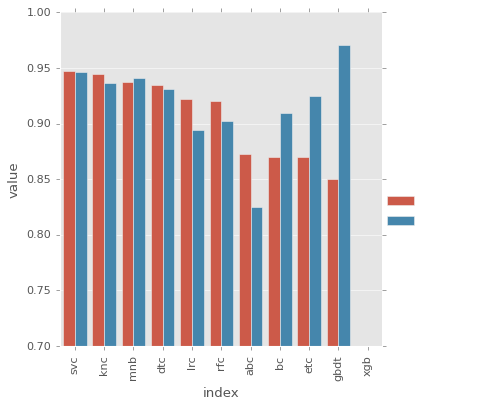

<Figure size 1440x320 with 0 Axes>

In [81]:
sb.catplot(x = 'index', y='value', 
               hue = 'variable',data=df1, kind='bar',height=5)
plt.ylim(0.7,1.0)
plt.xticks(rotation='vertical')
plt.figure(figsize=(18,4))
plt.show()

# Model Evaluation

In [85]:
input_data = input('enter')
dataf = pd.DataFrame()
dataf = dataf.append([[input_data]])
dataf.rename(columns={0:'text'},inplace=True)
dataf['text']=dataf['text'].apply(text_transform)
vect = tf.transform(dataf['text']).toarray()
pred = mnb.predict(vect)
if pred[0]==1:
    print('spam')
else:
    print('Not Spam')

enter fbfv gev


spam
